# Assignment 6: Deep Learning

Let's build a **Siamese network model** for to detect duplicate questons. A Siamese network uses the same weights while working in tandem on two different input vectors to compute comparable output vectors. 

You'll need 'quora_duplicate_question_1000.csv' for this assignment. This dataset is in the following format

|q1 | q2 |is_duplicate|
|---|---|------|
|How do you take a screenshot on a Mac laptop?|  How do I take a screenshot on my MacBook Pro? ...|   1 |
|Is the US election rigged?|  Was the US election rigged?|   1 |
|How scary is it to drive on the road to Hana g...|  Do I need a four-wheel-drive car to drive all ...	|  0  |
|...|...| ...|

In this exercise, you'll feed a pair of q1 and q2 into a Siamese network to create representations of q1 and q2. Then based on the distance of the two representations, you determine if q1 and q2 are duplicate questions.

- Create a function **detect_duplicate( )** to detect sentiment as follows: 
  - the input parameter is the full filename path to quora_duplicate_question_1000.csv. Another optional parameter is a gensim word vector model.
  - convert $q1$ and $q2$ into padded sequences of numbers (see Exercise 5.2) 
  - **hold 20% of the data for testing**
  - **carefully select hyperparameters**,  in particular, input sentence length, filters, the number of filters, batch size, and epoch etc. 
  - create a CNN model with the training data. Some hints: 
    * Consider to use **pre-trained word vectors**, since your dataset is kind of small
    * In your model, you use CNN to extract features from q1 and q2, denoted as q1_vector and q2_vector, and then predict if they are duplicates based on the distances of these features. This part can be implemented as follows:<br>
    <i>from keras.layers import Lambda <br>
    from keras import backend as K <br>
    d = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))([q1_vector, q2_vector]) (see https://keras.io/layers/core/#lambda)<br>
    preds = Dense(1,activation='sigmoid', name='output')(d)</i>
    * Your model may have a structure shown below. 
  - print out auc and auc curve from testing data. 
     - Your ** auc should be about 70%**. 
     - If your auc is lower than that (e.g. below 70%), you need to tune the hyperparameters
- This function has no return. Besides your code, also provide a pdf document showing the following
  - How you choose the hyperparameters 
  - model summary
  - Screenshots of model trainning history 
  - Testing accuracy, precision, recall, and auc 
  - If you use pretrained word vectors, please describe which pretrained word vector you choose. You don't need to submit pretrained word vector files.


Hint: Possible structure of model:
<img src="model.png" width="35%">

Where the cnn model is shown below:
<img src="sub_model.png" width="50%">

In [ ]:
from keras.models import Model
# Add your import

In [2]:
# This part of code can be copied from notes

def cnn_model(FILTER_SIZES, \
              # filter sizes as a list
              MAX_NB_WORDS, \
              # total number of words
              MAX_DOC_LEN, \
              # max words in a doc
              NAME = 'cnn',\
              EMBEDDING_DIM=200, \
              # word vector dimension
              NUM_FILTERS=64, \
              # number of filters for all size
              PRETRAINED_WORD_VECTOR=None):            
    
    main_input = Input(shape=(MAX_DOC_LEN,), \
                       dtype='int32', name='main_input')
    
    if PRETRAINED_WORD_VECTOR is not None:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        weights=[PRETRAINED_WORD_VECTOR],\
                        trainable=False,\
                        name='embedding')(main_input)
    else:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        name='embedding')(main_input)
    # add convolution-pooling-flat block
    conv_blocks = []
    for f in FILTER_SIZES:
        conv = Conv1D(filters=NUM_FILTERS, kernel_size=f, \
                      activation='relu', name='conv_'+str(f))(embed_1)
        conv = MaxPooling1D(MAX_DOC_LEN-f+1, name='max_'+str(f))(conv)
        conv = Flatten(name='flat_'+str(f))(conv)
        conv_blocks.append(conv)
    
    if len(conv_blocks)>1:
        z=Concatenate(name='concate')(conv_blocks)
    else:
        z=conv_blocks[0]
        
    model = Model(name=NAME, inputs=main_input, outputs=z)
    
    return model

In [13]:
def detect_duplicate(datafile, wv_model):
    
    # Add your code

In [ ]:
wv_model = gensim.models.KeyedVectors.load_word2vec_format(\
                    '/Users/rliu/pyproject/genesis_backup/matching_net2/gensim_glove_vectors.txt', binary=False)
    

/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:59: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Overall Model:
sub CNN model for left or right CNN:
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 0s - loss: 0.6546 - accuracy: 0.6037 - val_loss: 0.6248 - val_accuracy: 0.6050

Epoch 00001: val_accuracy improved from -inf to 0.60500, saving model to best_model
Epoch 2/100
 - 0s - loss: 0.5116 - accuracy: 0.7613 - val_loss: 0.6067 - val_accuracy: 0.6300

Epoch 00002: val_accuracy improved from 0.60500 to 0.63000, saving model to best_model
Epoch 3/100
 - 0s - loss: 0.4452 - accuracy: 0.8388 - val_loss: 0.5988 - val_accuracy: 0.6350

Epoch 00003: val_accuracy improved from 0.63000 to 0.63500, saving model to best_model
Epoch 4/100
 - 0s - loss: 0.3900 - accuracy: 0.9225 - val_loss: 0.5931 - val_accuracy: 0.6400

Epoch 00004: val_accuracy improved from 0.63500 to 0.64000, saving model to best_model
Epoch 5/100
 - 0s - loss: 0.3416 - accuracy: 0.9613 - val_loss: 0.5893 - val_accur

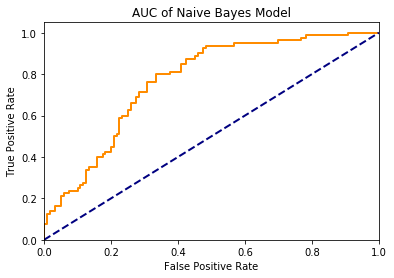

In [14]:

if __name__ == "__main__":  
    
    detect_duplicate("../../dataset/quora_duplicate_question_1000.csv", wv_model)

